In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
test = pd.read_csv("mnist_test.csv")
train = pd.read_csv("mnist_train.csv")
#importing the data

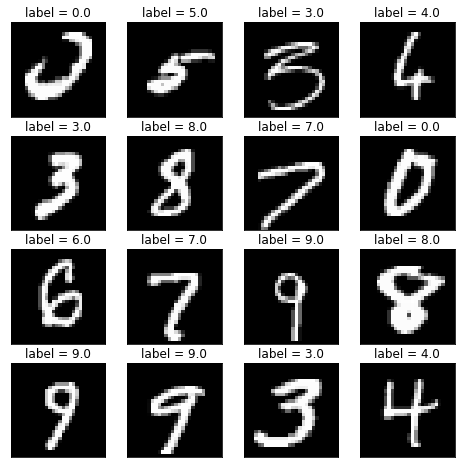

In [ ]:
train.head()

x_test = test.values
x_train, x_val, y_train, y_val = train_test_split(
    train.values[:,1:], train.values[:,0], test_size=0.2)

fig, ax = plt.subplots(4, 4, figsize=(8,8))
k = 0
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(x_train[k].reshape(28,28), cmap='gray')
        ax[i, j].set_title('label = %s' % (y_train[k]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        k+=1

In [ ]:
@ignore_warnings(category=ConvergenceWarning)
def logistic_regression():
  lr = LogisticRegression(max_iter=300, solver="lbfgs")
  lr.fit(x_train, y_train)
  y_val_pred = lr.predict(x_val)
  return y_val_pred

y_val_pred = logistic_regression()

ValueError: ignored

Model accuracy is 0.91208
Confusion Matrix:


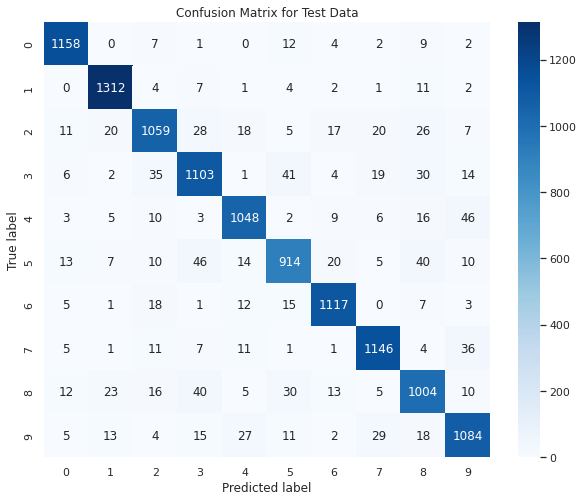

In [ ]:
print("Model accuracy is %0.5f" % (accuracy_score(y_val, y_val_pred)))
print("Confusion Matrix:")
cm = confusion_matrix(y_val, y_val_pred)
sns.set(rc={'figure.figsize':(10, 8)})
cm = sns.heatmap(cm, annot=True, cmap='Blues',  fmt='g')

_ = cm.set_ylabel('True label')
_ = cm.set_xlabel('Predicted label')
_ = cm.set_title("Confusion Matrix for Test Data")

In [ ]:
print(classification_report(y_val,y_val_pred))

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Correctly predicted images:


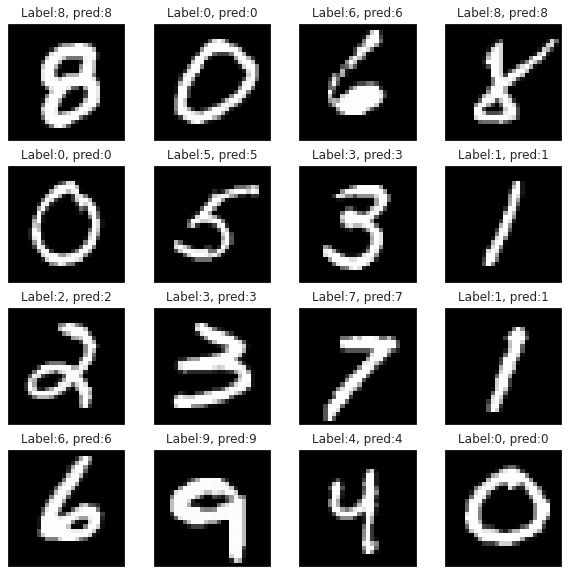

In [ ]:
print("Correctly predicted images:")
x_val_correct = x_val[y_val==y_val_pred,:]
y_val_correct = y_val[y_val==y_val_pred]
y_val_pred_correct = y_val_pred[y_val==y_val_pred]

k = 0
fig, ax = plt.subplots(4, 4, figsize=(10,10))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(x_val_correct[k].reshape(28,28), cmap='gray')
        ax[i, j].set_title('Label:%s, pred:%s' % (y_val_correct[k], y_val_pred_correct[k]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        k+=1

Incorrectly predicted images:


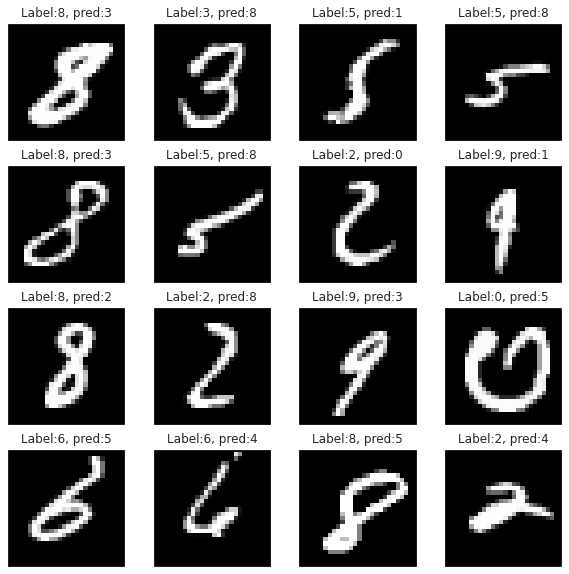

In [ ]:
print("Incorrectly predicted images:")
x_val_incorrect = x_val[y_val!=y_val_pred,:]
y_val_incorrect = y_val[y_val!=y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val!=y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(10,10))
k = 0
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(x_val_incorrect[k].reshape(28,28), cmap='gray')
        ax[i, j].set_title('Label:%s, pred:%s' % (y_val_incorrect[k], y_val_pred_incorrect[k]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        k+=1